In [2]:
import csv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# read xlsx file
def read_xlsx(file):
    df = pd.read_excel(file, header=0)
    return df

In [4]:
votes_meps_or = read_xlsx('data/EP9_RCVs_2022_06_22.xlsx')
voted_docs_or = read_xlsx('data/EP9_Voted_docs.xlsx')

In [5]:
print(votes_meps_or.shape)
votes_meps_or.head()

(811, 13469)


,WebisteEpID,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,...,13450,13451,13452,13453,13454,13455,13456,13457,13458,13459
0,197490,Magdalena,ADAMOWICZ,"ADAMOWICZ, Magdalena",yes,Poland,Independent,EPP,2019-07-02,2024-12-31,...,2,2,2,1,1,2,1,2,1,1
1,189525,Asim,ADEMOV,"ADEMOV, Asim",yes,Bulgaria,Citizens for European Development of Bulgaria,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
2,124831,Isabella,ADINOLFI,"ADINOLFI, Isabella",yes,Italy,Forza Italia,EPP,2019-07-02,2024-12-31,...,2,2,2,1,2,2,1,2,1,1
3,197826,Matteo,ADINOLFI,"ADINOLFI, Matteo",yes,Italy,Lega,IDG,2019-07-02,2024-12-31,...,2,2,1,2,2,1,1,3,2,1
4,197403,Alex,AGIUS SALIBA,"AGIUS SALIBA, Alex",yes,Malta,Partit Laburista,S&D,2019-07-02,2024-12-31,...,3,3,1,2,2,2,3,3,2,1


In [6]:
total_votes_meps = int(votes_meps_or.columns[-1])
total_votes_meps

13459

In [7]:
print(voted_docs_or.shape)
voted_docs_or.head()

(13459, 24)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,Policy area,Subject,Final vote?,Am No.,Author,RCV,Vote,Yes,No,Abs
0,1,1,1,15.07.2019,Tuesday - request by the GUE/NGL group,NaN,Non,Proposal for a decision,s,0,...,Foreign & security policy,Procedural vote,1.0,NaN,0,RCV,-,83,142,72
1,2,2,1,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 13,0.0,NaN,original text,RCV,+,311,269,33
2,3,2,2,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 14,0.0,NaN,original text,RCV,+,437,155,33
3,4,2,3,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 17,0.0,NaN,original text,RCV,+,441,158,27
4,5,2,4,18.07.2019,Situation at the USA-Mexican border,NaN,Non,Joint motion for a resolution,s,0,...,Foreign & security policy,Paragraph 19,0.0,NaN,original text,RCV,+,466,146,41


In [54]:
# Only choose legislative procedure with Parliament as co-legislator
voted_docs = voted_docs_or[voted_docs_or['Leg/Non-Leg/Bud'] == 'Leg']
voted_docs = voted_docs[voted_docs['Procedure'] != '*']
voted_docs = voted_docs[voted_docs['Procedure'] != '* ']

In [55]:
total_votes_leg = voted_docs.shape[0]
total_votes_leg

2582

How many times did MEPs on average not attend a vote?

In [10]:
# add column attendence with count of all 5s in each row
# get total votes by taking column header of last column

votes_meps_or['attendance'] = votes_meps_or.iloc[:, 10:].apply(lambda x: (x.ne(5).sum()/total_votes_meps), axis=1)


# average attendance
mean_att_EP9 = votes_meps_or['attendance'].mean()
print(f"Between 2019-2022, the average attendance of MEPs to all votes was {mean_att_EP9:.2%}")

Between 2019-2022, the average attendance of MEPs to all votes was 98.57%


How many votes were rejected?

In [11]:
# percentage of votes rejected
votes_rejected = voted_docs[voted_docs['Vote'] == '-'].shape[0]
votes_rejected_perc = votes_rejected/total_votes_leg
print(f"Between 2019-2022, {votes_rejected_perc:.2%} of votes were rejected")

Between 2019-2022, 38.26% of votes were rejected


How many laws were passed after the first reading?

In [12]:
# percentage of votes accepted or rejected after the first reading
votes_first_reading = voted_docs[voted_docs['Procedure'] == '***I'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the first reading.")

votes_first_reading = voted_docs[voted_docs['Procedure'] == '***II'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the second reading.")


votes_first_reading = voted_docs[voted_docs['Procedure'] == '***III'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were accepted or rejected after the third reading.")


votes_first_reading = voted_docs[voted_docs['Procedure'] == '***'].shape[0]
votes_first_reading_perc = votes_first_reading/total_votes_leg
print(f"Between 2019-2022, {votes_first_reading_perc:.2%} of votes were on resolutions or motions of resolutions initiated by the parliament.")


Between 2019-2022, 92.53% of votes were accepted or rejected after the first reading.
Between 2019-2022, 4.73% of votes were accepted or rejected after the second reading.
Between 2019-2022, 0.00% of votes were accepted or rejected after the third reading.
Between 2019-2022, 2.71% of votes were on resolutions or motions of resolutions initiated by the parliament.


Establish Majority Labels

In [14]:
# Reshape df_mps to calculate vote percentages
votes_meps = votes_meps_or.drop(columns=[
    'Fname', 'Lname', 'WebisteEpID', "Activ", "Country", "Party", "Start", "End", "attendance"
    ])
# unpivot dataframe from wide to long format
df_mps_melted = votes_meps.melt(id_vars=['FullName', 'EPG'], var_name='Title', value_name='Vote')
#change vote to int
df_mps_melted['Vote'] = df_mps_melted['Vote'].astype(int)

print(df_mps_melted.shape)
display(df_mps_melted.head(20))

(10915249, 4)


,FullName,EPG,Title,Vote
0,"ADAMOWICZ, Magdalena",EPP,1,5
1,"ADEMOV, Asim",EPP,1,5
2,"ADINOLFI, Isabella",EPP,1,3
3,"ADINOLFI, Matteo",IDG,1,2
4,"AGIUS SALIBA, Alex",S&D,1,4
5,"AGUILAR, Mazaly",ECR,1,2
6,"AGUILERA, Clara",S&D,1,4
7,"AINSLIE, Scott",Greens/EFA,1,1
8,"AL-SAHLANI, Abir",REG,1,5
9,"ALEXANDROV YORDANOV, Alexander",EPP,1,5


In [15]:
# print number of zeros for votes
print(f"Number of zeros in votes: {df_mps_melted[df_mps_melted['Vote'] == 0].shape[0]}")

Number of zeros in votes: 1394901


In [16]:
# set all votes > 1 to 0
df_mps_melted['Vote'] = df_mps_melted['Vote'].apply(lambda x: 0 if x > 1 else x)
df_mps_melted.head(20)

,FullName,EPG,Title,Vote
0,"ADAMOWICZ, Magdalena",EPP,1,0
1,"ADEMOV, Asim",EPP,1,0
2,"ADINOLFI, Isabella",EPP,1,0
3,"ADINOLFI, Matteo",IDG,1,0
4,"AGIUS SALIBA, Alex",S&D,1,0
5,"AGUILAR, Mazaly",ECR,1,0
6,"AGUILERA, Clara",S&D,1,0
7,"AINSLIE, Scott",Greens/EFA,1,1
8,"AL-SAHLANI, Abir",REG,1,0
9,"ALEXANDROV YORDANOV, Alexander",EPP,1,0


In [129]:
# group df_mps_melted by EPG and Title and calculate the sum the votes that are 1
df_mps_grouped = df_mps_melted.groupby(['EPG', 'Title']).agg({'Vote': 'sum'}).reset_index() # in agg-function, function to use on column has to ba a string, see "sum"

# sort the df_mps_grouped by EPG and Title
df_mps_grouped = df_mps_grouped.sort_values(by=['Title', "EPG"])
#print(df_mps_grouped.head(20))

In [18]:
# define number of members per group
num_SD = 144
num_EPP = 176
num_IDG = 64
num_NI = 46
num_Greens = 71
num_REG = 102
num_ECR = 64
num_Left = 38

# dataframe with group name and number of members
group_members = pd.DataFrame({'group': ['S&D', 'EPP', 'IDG', 'NI', 'Greens/EFA', 'REG', 'ECR', 'The Left'],
                              'members': [num_SD, num_EPP, num_IDG, num_NI, num_Greens, num_REG, num_ECR, num_Left]})
# set groups as index
group_members.set_index('group', inplace=True)
group_members

,members
group,
S&D,144
EPP,176
IDG,64
NI,46
Greens/EFA,71
REG,102
ECR,64
The Left,38


In [44]:
# calculate percentage of votes of all members in party
# go through each row of df_mps_grouped and divide the vote by the number of members in the party
for index, row in df_mps_grouped.iterrows():
    group = row['EPG']
    df_mps_grouped.loc[index, 'Perc_in_favour'] = round(row['Vote']/(group_members.loc[group, 'members']), 3)
display(df_mps_grouped.head(20))

,EPG,Title,Vote,Perc_in_favour
0,ECR,1,0,0.000
13459,EPP,1,3,0.017
26918,Greens/EFA,1,40,0.563
40377,IDG,1,0,0.000
53836,NI,1,2,0.043
67295,REG,1,2,0.020
80754,S&D,1,13,0.090
94213,The Left,1,22,0.579
1,ECR,2,1,0.016
13460,EPP,2,5,0.028


In [45]:
# pivot table back to wide format, set EPG and Title as columns, keep index from df_mps_grouped
group_perc_in_favour = df_mps_grouped.pivot(index='Title', columns='EPG', values='Perc_in_favour')

display(group_perc_in_favour.head(20))

# save group_perc_in_favour to csv
group_perc_in_favour.to_csv('data/group_perc_in_favour.csv')

EPG,ECR,EPP,Greens/EFA,IDG,NI,REG,S&D,The Left
Title,,,,,,,,
1,0.000,0.017,0.563,0.000,0.043,0.020,0.090,0.579
2,0.016,0.028,0.944,0.000,0.152,0.814,0.792,0.842
3,0.031,0.670,0.873,0.000,0.152,0.892,0.840,0.895
4,0.016,0.710,0.915,0.000,0.109,0.902,0.847,0.763
5,0.016,0.733,0.944,0.000,0.087,0.971,0.889,0.947
6,0.734,0.784,0.070,0.000,0.348,0.990,0.076,0.868
7,0.719,0.733,0.099,0.047,0.043,0.961,0.451,0.053
8,0.750,0.818,0.944,0.438,0.435,0.971,0.667,0.105
9,0.781,0.818,0.042,0.422,0.283,0.980,0.535,0.000


In [131]:
# merge group_perc_in_favour with voted_docs, merge index with Vote ID
voted_docs['Vote ID'] = voted_docs['Vote ID'].astype(int)
voted_docs_groups = voted_docs.merge(group_perc_in_favour, left_on='Vote ID', right_index=True)

display(voted_docs.shape)
print(group_perc_in_favour.shape)
print(voted_docs_groups.shape)
display(voted_docs_groups.head(10))
print(type(voted_docs_groups))


(2582, 24)

(13459, 8)
(2582, 32)


,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,No,Abs,ECR,EPP,Greens/EFA,IDG,NI,REG,S&D,The Left
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,23,17,0.562,0.790,0.817,0.531,0.522,0.755,0.826,0.763
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,24,2,0.750,0.818,0.859,0.812,0.652,0.833,0.861,0.789
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,30,46,0.688,0.835,0.901,0.234,0.543,0.882,0.875,0.816
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0,6,0.781,0.835,0.930,0.781,1.109,0.902,0.910,0.789
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,64,66,0.703,0.841,0.887,0.000,0.391,0.824,0.819,0.868
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,128,74,0.750,0.835,0.070,0.016,0.500,1.000,0.819,0.000
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,140,71,0.891,0.795,0.070,0.031,0.435,1.010,0.903,0.000
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,28,11,0.875,0.915,1.042,0.953,0.522,1.069,1.000,0.658
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,14,47,0.875,0.898,1.028,0.953,0.565,1.039,0.993,0.053
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,12,51,0.875,0.915,1.042,0.922,0.565,1.069,1.000,0.053


<class 'pandas.core.frame.DataFrame'>


In [95]:
def get_majorities(df, threshold):
    for index, row in df.iterrows():
        if row["EPP"] >= threshold and row["S&D"] >= threshold:
            df.loc[index, 'Consensus'] = 1
            df.loc[index, 'RM'] = 0
            df.loc[index, 'LM'] = 0
        elif row["S&D"] >= threshold:
            df.loc[index, 'LM'] = 1
            df.loc[index, 'RM'] = 0
        elif row["EPP"] >= threshold:
            df.loc[index, 'RM'] = 1
            df.loc[index, 'LM'] = 0
        else:
            df.loc[index, 'RM'] = 0
            df.loc[index, 'LM'] = 0
            df.loc[index, 'Consensus'] = 0
    # set up empty dataframe to store thresholds
    sum_Consensus = df['Consensus'].sum()
    sum_RM = df['RM'].sum()
    sum_LM = df['LM'].sum()
    threshold = {'threshold': [threshold]}
    threshold['Consensus'] = [sum_Consensus]
    threshold['RM'] = [sum_RM]
    threshold['LM'] = [sum_LM]
    thresholds_df = pd.DataFrame(threshold)
    thresholds_df.set_index('threshold', inplace=True)

    return df, thresholds_df


In [132]:
voted_docs_groups = get_majorities(voted_docs_groups, 0.66)
display(voted_docs_groups[0].head(10))

# save voted_docs
voted_docs_final = voted_docs_groups[0]

# save voted_docs_groups to csv
voted_docs_final.to_csv('data/voted_docs_final.csv')

,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,Rapporteur,...,EPP,Greens/EFA,IDG,NI,REG,S&D,The Left,Consensus,RM,LM
82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,Blinkevičiūtė,...,0.790,0.817,0.531,0.522,0.755,0.826,0.763,1.0,0.0,0.0
83,84,10,1,22.10.2019,Fishing authorisations for Union fishing vesse...,***I,Leg,Draft legislative resolution,s,Davies,...,0.818,0.859,0.812,0.652,0.833,0.861,0.789,1.0,0.0,0.0
84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,Van Overtveldt,...,0.835,0.901,0.234,0.543,0.882,0.875,0.816,1.0,0.0,0.0
85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,Delli,...,0.835,0.930,0.781,1.109,0.902,0.910,0.789,1.0,0.0,0.0
149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,Omarjee,...,0.841,0.887,0.000,0.391,0.824,0.819,0.868,1.0,0.0,0.0
293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,GYŐRI,...,0.835,0.070,0.016,0.500,1.000,0.819,0.000,1.0,0.0,0.0
366,367,18,1,28.11.2019,EU/USA Agreement on the allocation of a share ...,***,Leg,Draft legislative resolution,s,Lange,...,0.795,0.070,0.031,0.435,1.010,0.903,0.000,1.0,0.0,0.0
457,458,19,1,17.12.2019,Macro-financial assistance to Jordan,***I,Leg,Draft legislative resolution,s,Regimenti,...,0.915,1.042,0.953,0.522,1.069,1.000,0.658,1.0,0.0,0.0
458,459,19,1,17.12.2019,EU-Switzerland Agreement on the stepping up of...,***,Leg,Draft legislative resolution,s,Metsola,...,0.898,1.028,0.953,0.565,1.039,0.993,0.053,1.0,0.0,0.0
459,460,19,1,17.12.2019,EU-Liechtenstein Agreement on the stepping up ...,***,Leg,Draft legislative resolution,s,Metsola,...,0.915,1.042,0.922,0.565,1.069,1.000,0.053,1.0,0.0,0.0


,Consensus,RM,LM,Consensus%,RM%,LM%
threshold,,,,,,
0.66,1304.0,230.0,335.0,0.51,0.09,0.13
0.75,1304.0,234.0,342.0,0.51,0.09,0.13
0.80,1291.0,254.0,340.0,0.50,0.10,0.13
0.85,1250.0,238.0,311.0,0.48,0.09,0.12
0.90,1160.0,222.0,292.0,0.45,0.09,0.11
0.95,1032.0,240.0,311.0,0.40,0.09,0.12
0.96,894.0,274.0,275.0,0.35,0.11,0.11
0.97,882.0,230.0,320.0,0.34,0.09,0.12
0.98,494.0,233.0,187.0,0.19,0.09,0.07


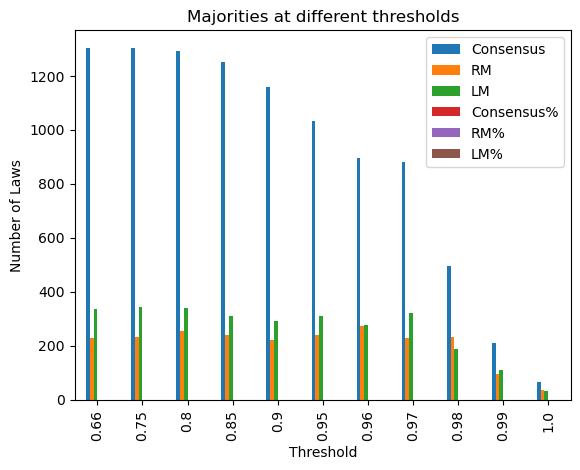

In [128]:
voted_groups_066 = get_majorities(voted_docs_groups[0], 0.66)
voted_groups_075 = get_majorities(voted_docs_groups[0], 0.75)
voted_groups_080 = get_majorities(voted_docs_groups[0], 0.80)
voted_groups_085 = get_majorities(voted_docs_groups[0], 0.85)
voted_groups_090 = get_majorities(voted_docs_groups[0], 0.90)
voted_groups_095 = get_majorities(voted_docs_groups[0], 0.95)
voted_groups_097 = get_majorities(voted_docs_groups[0], 0.97)
voted_groups_096 = get_majorities(voted_docs_groups[0], 0.96)
voted_groups_098 = get_majorities(voted_docs_groups[0], 0.98)
voted_groups_099 = get_majorities(voted_docs_groups[0], 0.99)
voted_groups_100 = get_majorities(voted_docs_groups[0], 1.00)

# join the thresholds dataframes
thresholds = pd.concat([voted_groups_066[1], 
                        voted_groups_075[1], 
                        voted_groups_080[1], 
                        voted_groups_085[1], 
                        voted_groups_090[1],
                        voted_groups_095[1],
                        voted_groups_096[1],
                        voted_groups_097[1],
                        voted_groups_098[1],
                        voted_groups_099[1],
                        voted_groups_100[1]]
                        )
# add column with percentage of total votes
thresholds['Consensus%'] = round(thresholds['Consensus']/total_votes_leg, 2)
thresholds['RM%'] = round(thresholds['RM']/total_votes_leg, 2)
thresholds['LM%'] = round(thresholds['LM']/total_votes_leg, 2)

display(thresholds)

# plot the thresholds
thresholds.plot(kind='bar', stacked=False)
plt.title('Majorities at different thresholds')
plt.ylabel('Number of Laws')
plt.xlabel('Threshold')
plt.show()


If the major parties voted in favour, in how many cases did the further right- or left-leaning parties vote with them?

In [176]:
def get_vote_alingment(df, groups, majorities):
    # create empty dataframe of shape (len(groups), len(majorities))
    maj_df = pd.DataFrame(index=groups, columns=[majorities*2])
    for group in groups:
        group_val = []
        for maj in majorities:
            sum_maj_group = df[(df[maj] == 1) & (df[group] >= 0.66)].shape[0]
            perc_maj_group = round(sum_maj_group/df[maj].sum(), 4)
            formatted_perc = "{:.2f}%".format(perc_maj_group * 100)
            group_val.append(sum_maj_group)
            group_val.append(formatted_perc)
        # add group_val as row to maj_df
        maj_df.loc[group] = group_val
    return maj_df

In [177]:
vote_alingment = get_vote_alingment(voted_docs_final, ['The Left', "Greens/EFA", "S&D", "REG", "EPP", "ECR", "IDG"], ['LM', "RM", "Consensus"])
# rename columns
vote_alingment.columns = ['LM', 'LM%', 'RM', 'RM%', 'Consensus', 'Consensus%']
vote_alingment.index.name = "Voted with"
display(vote_alingment)

,LM,LM%,RM,RM%,Consensus,Consensus%
Voted with,,,,,,
The Left,307,91.64%,37,16.09%,917,70.32%
Greens/EFA,310,92.54%,30,13.04%,1047,80.29%
S&D,335,100.00%,0,0.00%,1304,100.00%
REG,145,43.28%,108,46.96%,1240,95.09%
EPP,0,0.00%,230,100.00%,1304,100.00%
ECR,22,6.57%,135,58.70%,777,59.59%
IDG,36,10.75%,131,56.96%,542,41.56%
